# `Transforms`

In this module, some signal transforms are contained.

In [1]:
import dsptoolbox as dsp
from os.path import join
import matplotlib.pyplot as plt
import numpy as np

### Waterfall plot

(<Figure size 1000x800 with 1 Axes>,
 <Axes3DSubplot: xlabel='Time / s', ylabel='Frequency / Hz', zlabel='dBFS (normalized @ peak)'>)

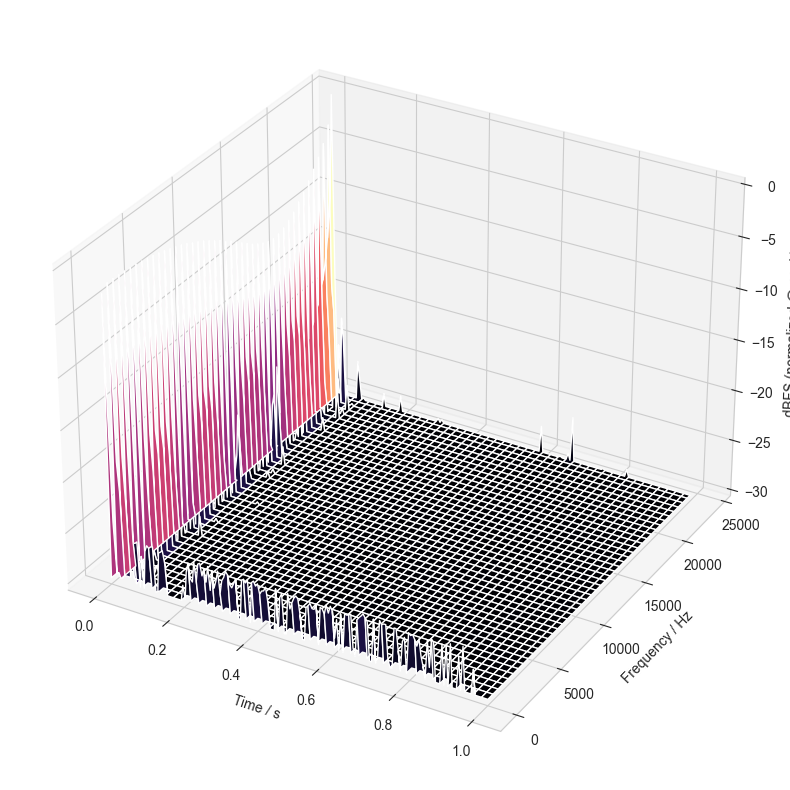

In [2]:
rir = dsp.Signal(join('data', 'rir.wav'), signal_type='rir')
rir.set_spectrogram_parameters(window_length_samples=256, overlap_percent=0,
                               window_type='boxcar')
dsp.transforms.plot_waterfall(rir, dynamic_range_db=30)

### Cepstrum

(0.0, 0.05)

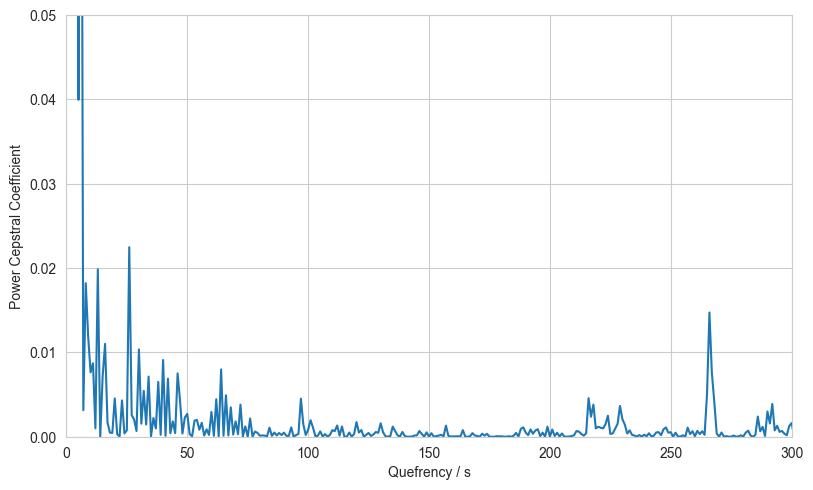

In [3]:
speech = dsp.Signal(join('data', 'speech.flac'))
cp = dsp.transforms.cepstrum(speech, mode='power')
fig, ax = dsp.plots.general_plot(
    range(len(cp)), cp, xlabel='Quefrency / s',
    ylabel='Power Cepstral Coefficient', log=False, returns=True)
ax.set_xlim([0, 300])
ax.set_ylim([0, 5e-2])

### MFCC
The mel-frequency cepstral coefficients is an audio feature used in speech recognition systems and certain Machine Learning applications.

/Users/neumanndev/opt/anaconda3/envs/dsp-dev11/lib/python3.11/site-packages/dsptoolbox/transforms/transforms.py:320: RuntimeWarning: divide by zero encountered in log
  log_sp = 2*np.log(np.abs(sp))


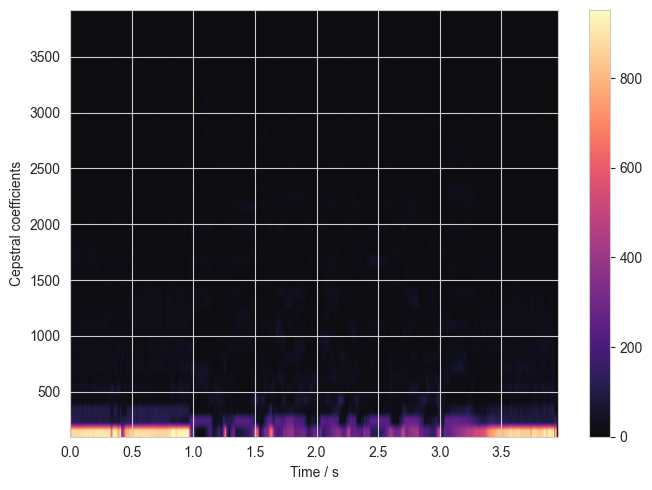

In [4]:
dsp.transforms.mfcc(speech);

### Log-mel Spectrogram
This function turns the axis of a spectrogram from Hz to Mel bands

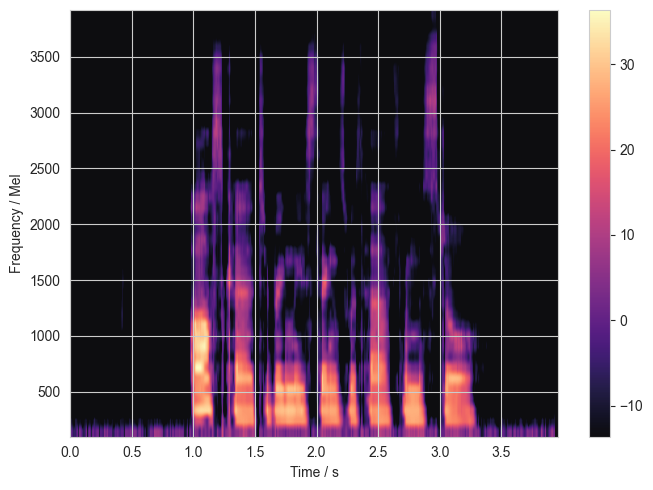

In [5]:
dsp.transforms.log_mel_spectrogram(speech);

### Inverse STFT
The STFT matrix of a multi-channel signal can be turned back into the signal by using the inverse transform. The differences between the signals are due to numerical errors and depend on the type of window and overlap used.

Remark: when setting `detrend=True` or `padding=False` while acquiring the STFT, some small signal distortions might arise.

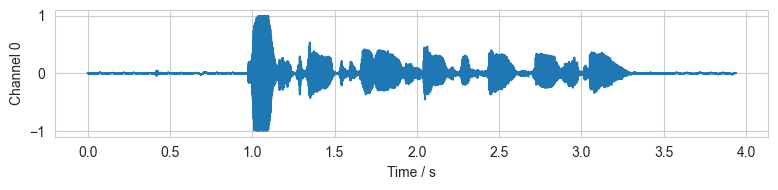

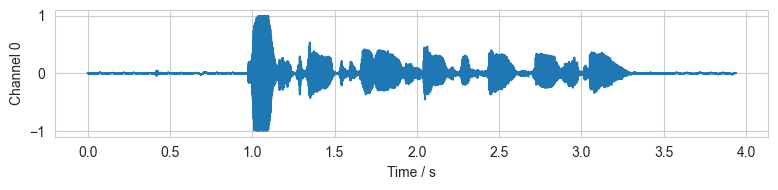

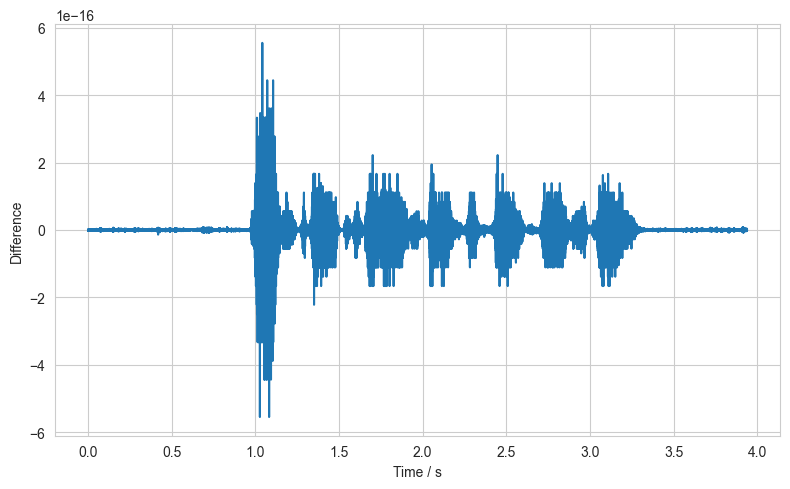

In [6]:
t, f, sp = speech.get_spectrogram()
speech_rec = dsp.transforms.istft(sp, original_signal=speech)

speech.plot_time()
speech_rec.plot_time()

dsp.plots.general_plot(
    speech.time_vector_s, speech.time_data - speech_rec.time_data, log=False,
    xlabel='Time / s', ylabel='Difference')

## Chroma STFT
The STFT scale in Chroma gives insight into harmonic relations in musical content.

It is adapted to the western twelve-tone scale.

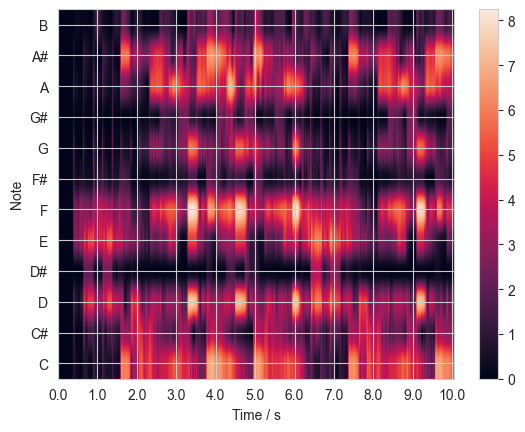

In [10]:
piano = dsp.Signal(join('data', 'fuer_elise.wav'))
# Convert to mono, mid
piano.time_data = piano.time_data.mean(axis=1)

t, chroma, pitch, fig, ax = dsp.transforms.chroma_stft(
    piano, compression=0.1, plot_channel=0)

## CWT
Continuous wavelet transform for time-frequency analysis using wavelets

(1, 72)

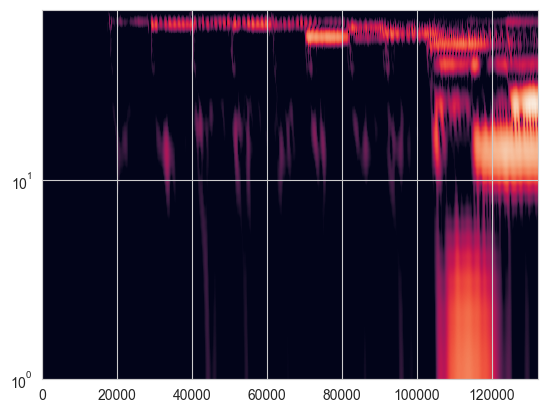

In [27]:
piano = dsp.Signal(join('data', 'fuer_elise.wav'))
# Convert to mono, mid - Only 3 seconds because of long computation time
piano.time_data = piano.time_data.mean(axis=1)[:3*piano.sampling_rate_hz]

freqs = 440*2**(np.arange(-2, 1, 1/24))
morlet = dsp.transforms.MorletWavelet(b=None, h=4)
cwt = dsp.transforms.cwt(piano, freqs, morlet, synchrosqueezed=False)
data = 20*np.log10(np.clip(np.abs(cwt[..., 0]), a_min=1e-15, a_max=None))
plt.imshow(data, aspect='auto', origin='lower',
           vmax=data.max(), vmin=data.max()-30)
plt.yscale('log')
plt.ylim([1, data.shape[0]])

(1, 72)

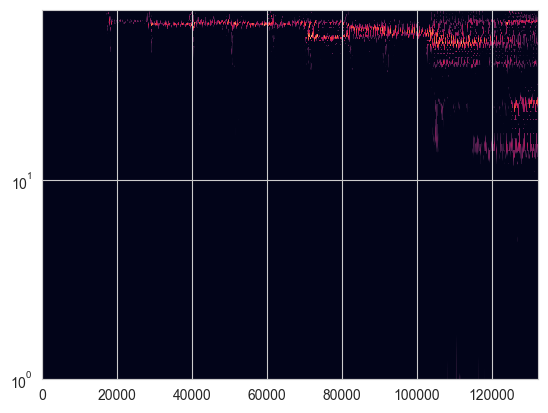

In [28]:
cwt_sync = dsp.transforms.cwt(piano, freqs, morlet, synchrosqueezed=True)
data = 20*np.log10(np.clip(np.abs(cwt_sync[..., 0]), a_min=1e-15, a_max=None))
plt.imshow(data, aspect='auto', origin='lower',
           vmax=data.max(), vmin=data.max()-30)
plt.yscale('log')
plt.ylim([1, data.shape[0]])